In [264]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [265]:
# Load data
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

df_train_og = df_train.copy()
df_test_og = df_test.copy()

In [266]:
df_train

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,...,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [267]:
df_test

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,1999998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


## EDA

In [268]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

The train data has 21 columns and 1200000 rows.

In [269]:
df_train.isna().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [270]:
(df_train.isna().sum())/len(df_train)*100

id                       0.000000
Age                      1.558750
Gender                   0.000000
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Education Level          0.000000
Occupation              29.839583
Health Score             6.173000
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Policy Start Date        0.000000
Customer Feedback        6.485333
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64

In [271]:
(df_test.isna().sum())/len(df_test)*100

id                       0.000000
Age                      1.561125
Gender                   0.000000
Annual Income            3.732500
Marital Status           1.542000
Number of Dependents     9.141250
Education Level          0.000000
Occupation              29.890625
Health Score             6.181125
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.350250
Vehicle Age              0.000375
Credit Score            11.431375
Insurance Duration       0.000250
Policy Start Date        0.000000
Customer Feedback        6.534500
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
dtype: float64

### Univariate Analysis

#### Age

In [272]:
df_train['Age'].describe()

count    1.181295e+06
mean     4.114556e+01
std      1.353995e+01
min      1.800000e+01
25%      3.000000e+01
50%      4.100000e+01
75%      5.300000e+01
max      6.400000e+01
Name: Age, dtype: float64

Age column has mean of 41. and standard deviation of 13.5. Minimum age 18 and max age is 64.

In [273]:
# filling missing values with mean of age.
mean_age = df_train['Age'].mean()
df_train['Age'] = df_train['Age'].fillna(mean_age)
df_test['Age'] = df_test['Age'].fillna(mean_age)

df_train['Age'].isna().sum()

0

#### Annual Income

<Axes: ylabel='Frequency'>

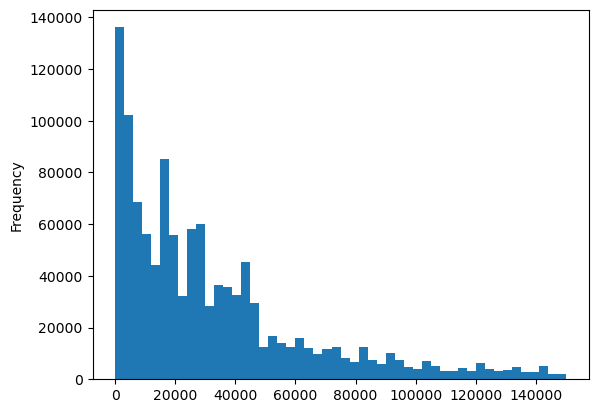

In [274]:
df_train['Annual Income'].plot(kind='hist', bins=50)

The Distribution of annual income is right skewed meaning majority of the data points are concentrated on the left side of the distribution.

In [275]:
# Fill missing data of annula income with median.
median_annual_income = df_train['Annual Income'].median()
df_train['Annual Income'] = df_train['Annual Income'].fillna(median_annual_income)
df_test['Annual Income'] = df_test['Annual Income'].fillna(median_annual_income)

df_train['Annual Income'].isna().sum()

0

<Axes: ylabel='Annual Income'>

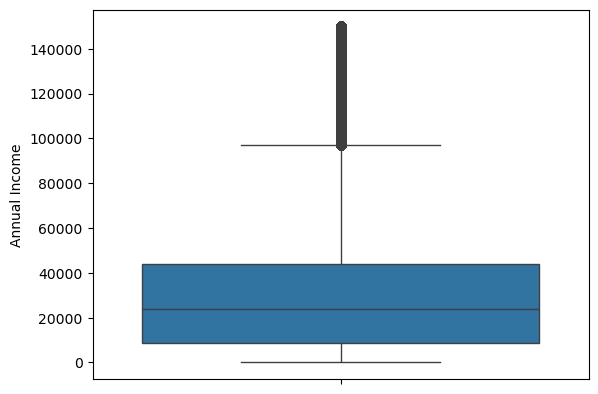

In [276]:
sns.boxplot(data=df_train['Annual Income'])

Income column has outliers. can be treated if necessary.

In [277]:
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df[column]

<Axes: ylabel='Annual Income'>

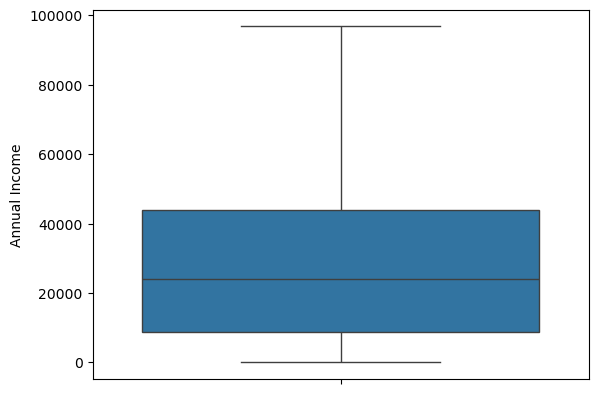

In [278]:
df_train['Annual Income'] = treat_outliers(df_train, 'Annual Income')
df_test['Annual Income'] = treat_outliers(df_test, 'Annual Income')

sns.boxplot(data=df_train['Annual Income'])

### Marital Status

In [279]:
df_train['Marital Status'].value_counts(dropna=False)

Marital Status
Single      395391
Married     394316
Divorced    391764
NaN          18529
Name: count, dtype: int64

<Axes: xlabel='Marital Status', ylabel='count'>

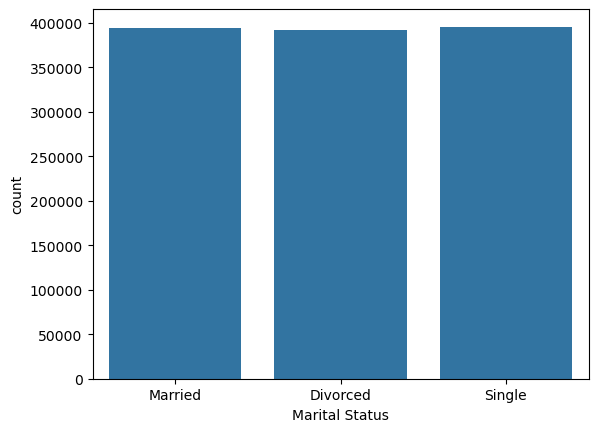

In [280]:
sns.countplot(data=df_train, x='Marital Status')

In [281]:
from scipy import stats

# Anova test
# Filter data by marital status
m_m = df_train[df_train["Marital Status"] == "Married"]["Premium Amount"]
m_s = df_train[df_train["Marital Status"] == "Single"]["Premium Amount"]
m_d = df_train[df_train["Marital Status"] == "Divorced"]["Premium Amount"]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(m_m, m_s, m_d)

# Print results
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 0.47749938262557573
P-value: 0.6203327884908305


Since the p-value is greater than 0.5. The null hypothesis cannot be rejected. This means the column is not important.

In [282]:
# Occupation
df_train['Occupation'].value_counts(dropna=False)

Occupation
NaN              358075
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

In [283]:
from scipy import stats

# Filter data by Occupation
m_m = df_train[df_train["Occupation"] == "Employed"]["Premium Amount"]
m_s = df_train[df_train["Occupation"] == "Self-Employed"]["Premium Amount"]
m_d = df_train[df_train["Occupation"] == "Unemployed"]["Premium Amount"]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(m_m, m_s, m_d)

# Print results
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 0.38937062646041737
P-value: 0.6774832523430152


In [284]:
# drop column
df_train.drop(columns=['Occupation', 'Marital Status'], inplace=True)
df_test.drop(columns=['Occupation', 'Marital Status'], inplace=True)

#### Number of dependents

In [285]:
df_train['Number of Dependents'].value_counts(dropna=False)

Number of Dependents
3.0    221475
4.0    220340
0.0    218124
2.0    215313
1.0    215076
NaN    109672
Name: count, dtype: int64

In [286]:
# annova test

from scipy import stats

# Filter data by Occupation
d0 = df_train[df_train["Number of Dependents"] == 0.0]["Premium Amount"]
d1 = df_train[df_train["Number of Dependents"] == 1.0]["Premium Amount"]
d2 = df_train[df_train["Number of Dependents"] == 2.0]["Premium Amount"]
d3 = df_train[df_train["Number of Dependents"] == 3.0]["Premium Amount"]
d4 = df_train[df_train["Number of Dependents"] == 4.0]["Premium Amount"]
d_null = df_train[df_train["Number of Dependents"].isnull()]["Premium Amount"]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(d0, d1, d2, d3,d4, d_null)

# Print results
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 21.300842177224546
P-value: 2.2486295998037232e-21


since the p value is less than 0.05. This means this column is important. we can reject null hypothesis.

In [287]:
# mode_dep =  df_train['Number of Dependents'].mode()[0]
df_train['Number of Dependents'] = df_train['Number of Dependents'].fillna(value = 99)
df_test['Number of Dependents'] = df_test['Number of Dependents'].fillna(value = 99)

#### Health score

In [288]:
df_train['Health Score']

0          22.598761
1          15.569731
2          47.177549
3          10.938144
4          20.376094
             ...    
1199995    13.772907
1199996    11.483482
1199997    14.724469
1199998    18.547381
1199999    10.125323
Name: Health Score, Length: 1200000, dtype: float64

In [289]:
# fillna with median
mean_health_sc =  df_train['Health Score'].median()
df_train['Health Score'] = df_train['Health Score'].fillna(value =mean_health_sc)
df_test['Health Score'] = df_test['Health Score'].fillna(value =mean_health_sc)

<Axes: ylabel='Health Score'>

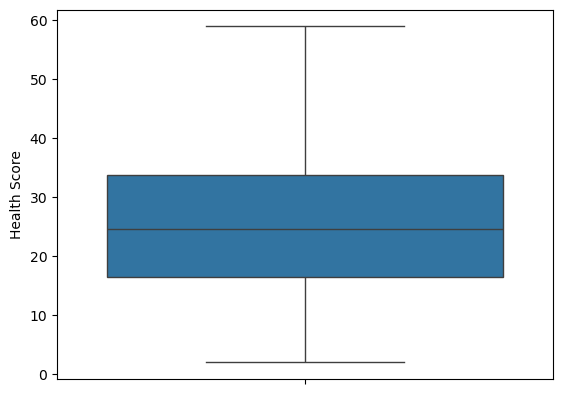

In [302]:
# outliers
sns.boxplot(data=df_train['Health Score'])

<Axes: xlabel='Previous Claims'>

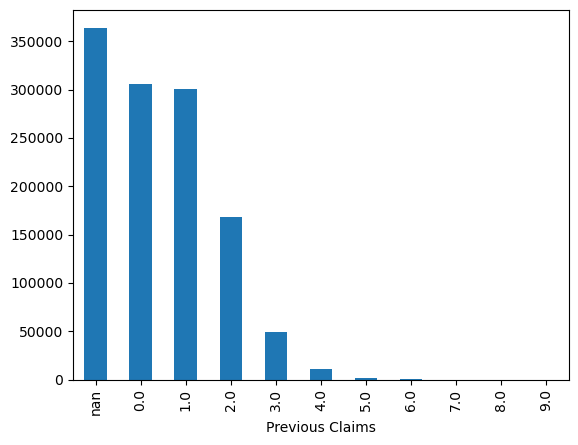

In [290]:
df_train['Previous Claims'].value_counts(dropna=False).plot(kind='bar')

In [291]:
# fill na with unknown
df_train['Previous Claims'] = df_train['Previous Claims'].fillna(value=99)
df_test['Previous Claims'] = df_test['Previous Claims'].fillna(value=99) 


In [292]:
df_train['Credit Score'].value_counts(dropna=False)

Credit Score
NaN      137882
434.0      4288
431.0      4277
757.0      4021
713.0      3977
          ...  
660.0       472
560.0       444
610.0       404
700.0       377
606.0       352
Name: count, Length: 551, dtype: int64

In [293]:
df_train['Credit Score'] = df_train['Credit Score'].fillna(value=999)
df_test['Credit Score'] = df_test['Credit Score'].fillna(value=999)

In [294]:
df_train['Customer Feedback'].value_counts(dropna=False)

Customer Feedback
Average    377905
Poor       375518
Good       368753
NaN         77824
Name: count, dtype: int64

In [295]:
df_train['Customer Feedback'] = df_train['Customer Feedback'].fillna(value='Not_Rated')
df_test['Customer Feedback'] = df_test['Customer Feedback'].fillna(value='Not_Rated')

In [296]:
df_train.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Number of Dependents    0
Education Level         0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             6
Credit Score            0
Insurance Duration      1
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [297]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [298]:
df_train.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Number of Dependents    0
Education Level         0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [299]:
df_test.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Number of Dependents    0
Education Level         0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
dtype: int64

In [300]:
df_train

,id,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,1.0,Bachelor's,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,3.0,Master's,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,3.0,High School,47.177549,Suburban,Premium,1.0,14.0,999.0,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,96871.0,2.0,Bachelor's,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,1.0,Bachelor's,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,0.0,Master's,13.772907,Urban,Premium,99.0,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,99.0,Master's,11.483482,Rural,Comprehensive,99.0,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,0.0,Master's,14.724469,Suburban,Basic,0.0,19.0,999.0,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,23911.0,1.0,PhD,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


<Axes: ylabel='Frequency'>

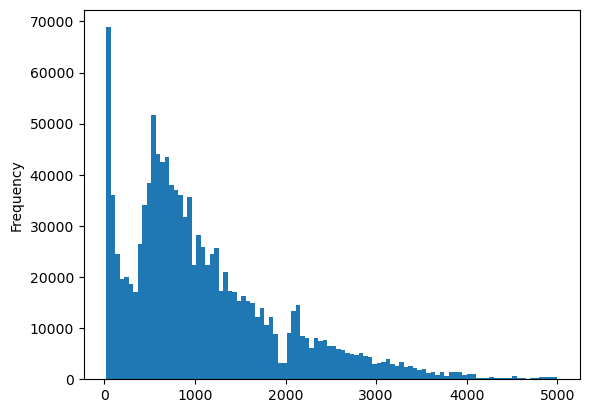

In [305]:
# Target variable
df_train['Premium Amount'].plot(kind='hist', bins=100)

<Axes: xlabel='Premium Amount', ylabel='Count'>

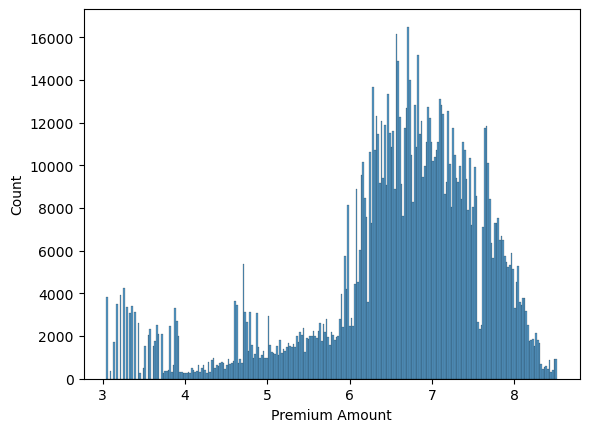

In [309]:
log_target = np.log1p(df_train['Premium Amount'])
sns.histplot(log_target)

In [307]:
df_train

,id,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,1.0,Bachelor's,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,3.0,Master's,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,3.0,High School,47.177549,Suburban,Premium,1.0,14.0,999.0,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,96871.0,2.0,Bachelor's,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,1.0,Bachelor's,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,0.0,Master's,13.772907,Urban,Premium,99.0,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,99.0,Master's,11.483482,Rural,Comprehensive,99.0,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,0.0,Master's,14.724469,Suburban,Basic,0.0,19.0,999.0,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,23911.0,1.0,PhD,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0
